<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

### Описание данных

`/datasets/Churn.csv`


***Признаки***

- `RowNumber` — индекс строки в данных

- `CustomerId` — уникальный идентификатор клиента

- `Surname` — фамилия

- `CreditScore` — кредитный рейтинг

- `Geography` — страна проживания

- `Gender` — пол

- `Age` — возраст

- `Tenure` — сколько лет человек является клиентом банка

- `Balance` — баланс на счёте

- `NumOfProducts` — количество продуктов банка, используемых клиентом

- `HasCrCard` — наличие кредитной карты

- `IsActiveMember` — активность клиента

- `EstimatedSalary` — предполагаемая зарплата

***Целевой признак***

- `Exited` — факт ухода клиента

## Подготовка данных

### Изучение общей информации

In [1]:
# !pip install --user -q pandas-profiling
# !conda install -c conda-forge pandas-profiling

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important; }</style>"))

In [3]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.metrics import recall_score
from sklearn.metrics  import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [4]:
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import recall_score

In [5]:
RANDOM_SEED = 0

In [6]:
show_sample = lambda x: display(x.sample(5, random_state=RANDOM_SEED).reset_index(drop=True))

In [7]:
df = pd.read_csv('../datasets/bank_customer_churn_6ds.csv')

In [8]:
show_sample(df)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,9395,15615753,Upchurch,597,Germany,Female,35,8.0,131101.04,1,1,1,192852.67,0
1,899,15654700,Fallaci,523,France,Female,40,2.0,102967.41,1,1,0,128702.10,1
2,2399,15633877,Morrison,706,Spain,Female,42,8.0,95386.82,1,1,1,75732.25,0
3,5907,15745623,Worsnop,788,France,Male,32,4.0,112079.58,1,0,0,89368.59,0
4,2344,15765902,Gibson,706,Germany,Male,38,5.0,163034.82,2,1,1,135662.17,0


In [9]:
print('Размер датасета: ', df.shape)

Размер датасета:  (10000, 14)


In [10]:
df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Видим, что разрядность не очень оптимальная для наших данных. Оптимизируем типы данных.

In [11]:
float_features = df.select_dtypes(include='float').columns
int_features = df.select_dtypes(include='integer').columns

df[float_features] = df[float_features].apply(pd.to_numeric, downcast='float')
df[int_features] = df[int_features].apply(pd.to_numeric, downcast='signed')

In [12]:
df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int16  
 1   CustomerId       10000 non-null  int32  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int16  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int8   
 7   Tenure           9091 non-null   float32
 8   Balance          10000 non-null  float32
 9   NumOfProducts    10000 non-null  int8   
 10  HasCrCard        10000 non-null  int8   
 11  IsActiveMember   10000 non-null  int8   
 12  EstimatedSalary  10000 non-null  float32
 13  Exited           10000 non-null  int8   
dtypes: float32(3), int16(2), int32(1), int8(5), object(3)
memory usage: 478.6+ KB


Видим, что сократили объем памяти почти в 2 раза.

In [13]:
pd.DataFrame(round((df.isna().mean()), 2)).style.background_gradient('coolwarm')\
                                                                .set_caption('% пропусков').format({0:'{:.2%}'.format})

,0
RowNumber,0.00%
CustomerId,0.00%
Surname,0.00%
CreditScore,0.00%
Geography,0.00%
Gender,0.00%
Age,0.00%
Tenure,9.00%
Balance,0.00%
NumOfProducts,0.00%


Пропуски имеются только в столбце "Tenure".

### Подготовка данных

In [14]:
df.Tenure.unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan],
      dtype=float32)

Столбец `Tenure` лучше перевести в формат `int`. Но прежде чем это сделать, обработаем пропуски, заполнив медианой. Предположим, что этот показатель зависит от возрастной категории и от страны проживания (возрастная категория - потому что зачастую банки ориентированы на определенную возрастную категорию, страна проживания - потому что зачастую банки выходят на рынок определенной страны в определенный период).

In [15]:
df['age_cat'] = pd.qcut(df['Age'], q=[0, 0.25, 0.5, 0.75, 0.95, 1])
df.groupby(['age_cat', 'Geography']).agg({'Tenure':'count'})

Tenure
age_cat        Geography        
(17.999, 32.0] France       1340
               Germany       583
               Spain         613
(32.0, 37.0]   France       1077
               Germany       480
               Spain         525
(37.0, 44.0]   France       1136
               Germany       592
               Spain         599
(44.0, 60.0]   France        779
               Germany       531
               Spain         403
(60.0, 92.0]   France        218
               Germany       107
               Spain         108

В принципе выборка репрезентативна, так что можем смело заполнять пропуски медианой.

In [16]:
df['Tenure'] = df['Tenure'].fillna(df.groupby(['age_cat', 'Geography'])['Tenure'].transform('median'))
df['Tenure'] = df['Tenure'].astype('int')
df['Tenure'] = pd.to_numeric(df['Tenure'], downcast='signed')

In [17]:
show_sample(df)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_cat
0,9395,15615753,Upchurch,597,Germany,Female,35,8,131101.046875,1,1,1,192852.671875,0,"(32.0, 37.0]"
1,899,15654700,Fallaci,523,France,Female,40,2,102967.406250,1,1,0,128702.101562,1,"(37.0, 44.0]"
2,2399,15633877,Morrison,706,Spain,Female,42,8,95386.820312,1,1,1,75732.250000,0,"(37.0, 44.0]"
3,5907,15745623,Worsnop,788,France,Male,32,4,112079.578125,1,0,0,89368.593750,0,"(17.999, 32.0]"
4,2344,15765902,Gibson,706,Germany,Male,38,5,163034.812500,2,1,1,135662.171875,0,"(37.0, 44.0]"


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2.500750e+03,5.000500e+03,7.500250e+03,1.000000e+04
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,1.562853e+07,1.569074e+07,1.575323e+07,1.581569e+07
CreditScore,10000.0,6.505288e+02,96.653299,350.00,5.840000e+02,6.520000e+02,7.180000e+02,8.500000e+02
Age,10000.0,3.892180e+01,10.487806,18.00,3.200000e+01,3.700000e+01,4.400000e+01,9.200000e+01
Tenure,10000.0,4.997900e+00,2.760010,0.00,3.000000e+00,5.000000e+00,7.000000e+00,1.000000e+01
Balance,10000.0,7.648589e+04,62397.406250,0.00,0.000000e+00,9.719854e+04,1.276442e+05,2.508981e+05
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
EstimatedSalary,10000.0,1.000902e+05,57510.492188,11.58,5.100211e+04,1.001939e+05,1.493883e+05,1.999925e+05


In [19]:
df.describe(include='object').T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [20]:
print('Кол-во дубликатов: ', df.duplicated().sum())

Кол-во дубликатов:  0


Больше всего людей в датасете с фамилией Smith и из Франции - 5014 значений. В данных превалирующее число мужчин. Дубликатов не обнаружено.

Сгруппируем листы из названий столбцов, чтобы выбрать наиболее релевантные для нас столбцы.

In [21]:
var_numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 
               'EstimatedSalary']
var_obj = ['Geography', 'Gender']
var_useless = ['RowNumber', 'CustomerId', 'Surname', 'age_cat']

### Удаление нерелевантных столбцов

In [22]:
df = df.drop(df[var_useless], axis = 1)

### Преобразование категориальных данных

Для того чтобы преобразовать категориальные данные будем использовать метод One Hot Encoding.

In [23]:
df_ohe = pd.get_dummies(df, drop_first=True,  columns=var_obj)

In [24]:
df_ohe

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000000,1,1,1,101348.882812,1,0,0,0
1,608,41,1,83807.859375,1,0,1,112542.578125,0,0,1,0
2,502,42,8,159660.796875,3,1,0,113931.570312,1,0,0,0
3,699,39,1,0.000000,2,0,0,93826.632812,0,0,0,0
4,850,43,2,125510.820312,1,1,1,79084.101562,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.000000,2,1,0,96270.640625,0,0,0,1
9996,516,35,10,57369.609375,1,1,1,101699.773438,0,0,0,1
9997,709,36,7,0.000000,1,0,1,42085.578125,1,0,0,0
9998,772,42,3,75075.312500,2,1,0,92888.523438,1,1,0,1


### Разделение на обучающую, валидационную и тестовую выборки

In [25]:
features = df_ohe.drop(['Exited'], axis=1)
target = df_ohe['Exited']

In [26]:
features_train, features_valid, target_train, target_valid = train_test_split(features, 
                                                                target, test_size=0.4, random_state=RANDOM_SEED)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.5,
                                                                            random_state=RANDOM_SEED)

Проверим в правильном ли соотношении разделились выборки.

In [27]:
print(features_train.shape)
print(target_train.shape)

print('-----')

print(features_valid.shape)
print(target_valid.shape)

print('-----')

print(features_test.shape)
print(target_test.shape)

(6000, 11)
(6000,)
-----
(2000, 11)
(2000,)
-----
(2000, 11)
(2000,)


Да, соотношение 3/1/1

### Масштабирование

Осуществим масштабирование признаков для улучшения сходимости модели, используя  стандартизацию данных.

In [28]:
scaler = StandardScaler()
features_train[var_numeric] = scaler.fit_transform(features_train[var_numeric])
features_valid[var_numeric] = scaler.fit_transform(features_valid[var_numeric])
features_test[var_numeric] = scaler.fit_transform(features_test[var_numeric])

In [29]:
show_sample(features_train)
print('-----------------------')
show_sample(features_valid)
print('-----------------------')
show_sample(features_test)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-2.541333,0.015752,1.811957,-1.199501,-0.936474,0.642724,-1.034253,1.050995,0,0,1
1,-0.785740,-0.272981,0.726519,-1.199501,-0.936474,0.642724,0.966881,-0.768401,0,0,1
2,0.432848,0.593218,-0.358918,-1.199501,0.798808,0.642724,0.966881,-1.276024,0,1,0
3,0.515465,-0.176737,-1.444355,-1.199501,0.798808,0.642724,-1.034253,1.096881,0,0,1
4,-1.105878,1.363172,1.450144,-1.199501,-0.936474,0.642724,-1.034253,0.442134,0,1,0


-----------------------


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-0.998771,0.405241,-0.349323,0.736681,-0.871171,0.652316,0.967527,-0.435118,1,0,0
1,0.114834,-0.751489,-0.715107,0.901646,0.822067,0.652316,-1.033563,-0.596761,0,0,0
2,-0.595752,-0.365912,-1.080890,0.865750,-0.871171,0.652316,0.967527,-0.600350,0,0,1
3,1.026929,0.212453,1.479594,-1.303936,-0.871171,0.652316,-1.033563,-1.173515,0,1,1
4,-0.309397,-0.751489,0.748027,0.911223,-0.871171,0.652316,0.967527,0.849979,0,0,1


-----------------------


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-2.217750,0.247935,1.060865,0.723981,0.820638,0.649981,-1.017147,0.458019,1,0,1
1,-2.044975,-0.303850,0.339556,0.127135,0.820638,0.649981,-1.017147,-0.316038,0,0,0
2,-1.557142,0.339900,-0.742407,-1.231577,0.820638,-1.538507,0.983142,1.743956,0,1,0
3,0.373863,-0.119921,-1.103061,0.282882,2.521442,-1.538507,-1.017147,-1.575852,1,0,0
4,0.312884,-0.487778,1.421519,-1.231577,0.820638,0.649981,0.983142,-0.076090,0,0,1


Как видим, масштабирование прошло успешно :)

## Выводы

* Датасет состоит из 1000 строк и 11 столбцов
* Увидели, что разрядность  не очень оптимальная для наших данных, оптимизировали типы данных. Таким образом сократили объем памяти почти в 2 раза.
* Пропуски были только в столбце "Tenure".
* Разделили всех клиентов на категории по возрасту для того, чтобы заполнить пропуски в столбце `Tenure` медианой. Предположили, что этот показатель зависит от возрастной категории и от страны проживания (возрастная категория - потому что зачастую банки ориентированы на определенную возрастную категорию, страна проживания - потому что зачастую банки выходят на рынок определенной страны в определенный период). 
* Для преобразования категориальных данных использован метод One Hot Encoding.
* Больше всего людей в датасете с фамилией Smith и из Франции - 5014 значений. В данных превалирующее число мужчин. Дубликатов не обнаружено.
* Произвели преобразование категориальных данных, используя метод One Hot Encoding
* Разделили данные на обучающую, валидационную и тестовую выборки
* Осуществили масштабирование признаков для улучшения сходимости модели, используя стандартизацию данных

## Исследование задачи

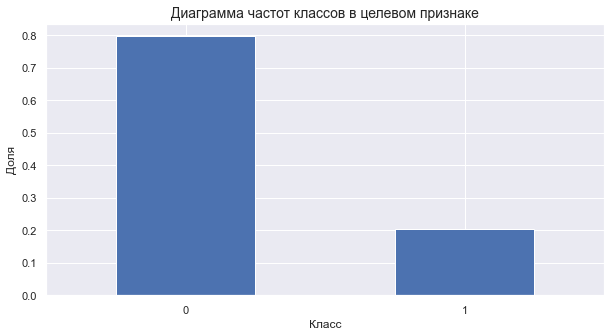

In [30]:
class_frequency = df_ohe['Exited'].value_counts(normalize=True)
plt.figure(figsize=(10, 5))
plt.title('Диаграмма частот классов в целевом признаке', size=14)
class_frequency.plot(kind='bar', rot=0)
plt.xlabel('Класс', size=12)
plt.ylabel('Доля', size=12)
plt.show()

Видим, что в данных превалирующее большинство тех, кто от нас не ушел. Наблюдаем дисбаланс классов.

Построим модели машинного обучения без учета дисбаланса классов. Поскольку в данном случае мы предсказываем класс, будем использовать модели решающего дерева и случайного леса. Подберем гиперпараметры для них.

### Дерево решений без учета дисбаланса

In [31]:
# Based on: https://stackoverflow.com/a/17303428 (для красивого оформления результата z-теста)
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [32]:
for depth in range(1, 20, 4):
    model_dt = DecisionTreeClassifier(random_state=RANDOM_SEED, max_depth = depth) #обучение с заданной глубиной дерева
    model_dt.fit(features_train, target_train) #обучение модели
    predictions_valid_dt = model_dt.predict(features_valid) #Предсказания
    probabilities_valid_dt = model_dt.predict_proba(features_valid)[:,1]
    
    print(color.UNDERLINE + "max_depth = " +  color.END, depth)
    print('Accuracy: ', accuracy_score(target_valid, predictions_valid_dt))
    print('Recall: ', recall_score(target_valid, predictions_valid_dt))
    print('Precision: ', precision_score(target_valid, predictions_valid_dt))
    print('F1: ', f1_score(target_valid, predictions_valid_dt))
    print('ROC-AUC: ', roc_auc_score(target_valid, probabilities_valid_dt))

max_depth =  1
Accuracy:  0.795
Recall:  0.0
Precision:  0.0
F1:  0.0
ROC-AUC:  0.6985043718361711
max_depth =  5
Accuracy:  0.8555
Recall:  0.5146341463414634
Precision:  0.7009966777408638
F1:  0.5935302390998594
ROC-AUC:  0.8433578769749962
max_depth =  9
Accuracy:  0.849
Recall:  0.5073170731707317
Precision:  0.6753246753246753
F1:  0.5793871866295265
ROC-AUC:  0.8115040650406504
max_depth =  13
Accuracy:  0.8245
Recall:  0.5463414634146342
Precision:  0.5758354755784062
F1:  0.560700876095119
ROC-AUC:  0.744727718975303
max_depth =  17
Accuracy:  0.788
Recall:  0.526829268292683
Precision:  0.484304932735426
F1:  0.5046728971962617
ROC-AUC:  0.7066513268906275


Остановимся на гиперпараметре `max_depth = 5`.Обучим модель дерева решений и проверим ее на тестовой выборке.

In [33]:
model_dt = DecisionTreeClassifier(random_state=RANDOM_SEED, max_depth=5)
model_dt.fit(features_train, target_train)
predictions_test_dt = model_dt.predict(features_test)
predictions_valid_dt = model_dt.predict(features_valid)
probabilities_test_dt = model_dt.predict_proba(features_test)[:,1]

In [34]:
print('Confusion matrix:')
print(confusion_matrix(target_test, predictions_test_dt))

Confusion matrix:
[[1512   70]
 [ 219  199]]


По матрице ошибок можно сказать, что модель угадала 1512 значений положительного класса. При этом отрицательного класса - 199 значений. При этом ложноотрицательных предсказаний - 219, а ложноположительных 70.

In [35]:
print(f'Accuracy: {accuracy_score(target_test, predictions_test_dt)}')
print(f'Recall: {recall_score(target_test, predictions_test_dt)}')
print(f'Precision: {precision_score(target_test, predictions_test_dt)}')
print(f'F1: {f1_score(target_test, predictions_test_dt)}')
print(f'ROC-AUC: {roc_auc_score(target_test, probabilities_test_dt)}')

Accuracy: 0.8555
Recall: 0.47607655502392343
Precision: 0.7397769516728625
F1: 0.5793304221251819
ROC-AUC: 0.8227321118564714


Анализируя метрики можно сказать, что из-за дисбаланса классов модель лучше предсказывает отрицательный класс. Доля правильных ответов (accuracy) равна 0.86. А вот полнота (recall) страдает, она выявляет, какую долю положительных среди всех ответов выделила модель - всего 0.47. Точность (precision) 0.74 - показывает какую долю объектов, распознанных как объекты положительного класса мы предсказали верно, т.е. около 70%. F1-мера (среднее гармоническое полноты и точности) всего лишь 0.58, ROC-AUC (площадь под ROC кривой) 0.82.

In [36]:
print(classification_report(target_valid, predictions_test_dt))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1590
           1       0.17      0.11      0.14       410

    accuracy                           0.71      2000
   macro avg       0.48      0.49      0.48      2000
weighted avg       0.66      0.71      0.68      2000



In [37]:
print(classification_report(target_test, predictions_test_dt))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1582
           1       0.74      0.48      0.58       418

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.84      2000



По результатам видим, что модель дерева решений нам не сильно подходит без учета дисбаланса классов.

### Случайный лес без учета дисбаланса

Начнем с подбора глубины при небольшом числе деревьев. Подберем гиперпараметры.

In [38]:
for depth in range(10, 101, 10):
    model_rf = RandomForestClassifier(random_state=RANDOM_SEED, n_estimators=20, max_depth=depth)
    model_rf.fit(features_train, target_train)
    predictions_valid_rf = model_rf.predict(features_valid)
    probabilities_valid_rf = model_rf.predict_proba(features_valid)[:, 1]

    print(color.UNDERLINE + "max_depth = " +  color.END, depth)
    print('Accuracy: {:.2f}'.format(accuracy_score(target_valid, predictions_valid_rf)))
    print('Recall: ', recall_score(target_valid, predictions_valid_rf))
    print('Precision: ', precision_score(target_valid, predictions_valid_rf))
    print('F1: ', f1_score(target_valid, predictions_valid_rf))
    print('ROC-AUC: ', roc_auc_score(target_valid, probabilities_valid_rf))
    

max_depth =  10
Accuracy: 0.87
Recall:  0.47560975609756095
Precision:  0.7831325301204819
F1:  0.5918057663125948
ROC-AUC:  0.8720118116275501
max_depth =  20
Accuracy: 0.87
Recall:  0.5
Precision:  0.7945736434108527
F1:  0.6137724550898203
ROC-AUC:  0.860715600552232
max_depth =  30
Accuracy: 0.86
Recall:  0.47317073170731705
Precision:  0.7432950191570882
F1:  0.5782414307004471
ROC-AUC:  0.8483586439637981
max_depth =  40
Accuracy: 0.86
Recall:  0.47317073170731705
Precision:  0.7432950191570882
F1:  0.5782414307004471
ROC-AUC:  0.8483586439637981
max_depth =  50
Accuracy: 0.86
Recall:  0.47317073170731705
Precision:  0.7432950191570882
F1:  0.5782414307004471
ROC-AUC:  0.8483586439637981
max_depth =  60
Accuracy: 0.86
Recall:  0.47317073170731705
Precision:  0.7432950191570882
F1:  0.5782414307004471
ROC-AUC:  0.8483586439637981
max_depth =  70
Accuracy: 0.86
Recall:  0.47317073170731705
Precision:  0.7432950191570882
F1:  0.5782414307004471
ROC-AUC:  0.8483586439637981
max_depth

Лучше всего подходит модель случайного леса с гиперпараметром max_depth = 20

In [39]:
for est in range(10, 101, 10):
    model_rf = RandomForestClassifier(random_state=RANDOM_SEED, n_estimators=est, max_depth=20)
    model_rf.fit(features_train, target_train)
    predictions_valid_rf = model_rf.predict(features_valid)
    probabilities_valid_rf = model_rf.predict_proba(features_valid)[:, 1]
    print(color.UNDERLINE + 'n_estimators = ' + color.END, est)
    print('Accuracy: {:.2f}'.format(accuracy_score(target_valid, predictions_valid_rf)))
    print('Recall: ', recall_score(target_valid, predictions_valid_rf))
    print('Precision: ', precision_score(target_valid, predictions_valid_rf))
    print('F1: ', f1_score(target_valid, predictions_valid_rf))
    print('ROC-AUC: ', roc_auc_score(target_valid, probabilities_valid_rf))

n_estimators =  10
Accuracy: 0.86
Recall:  0.4560975609756098
Precision:  0.751004016064257
F1:  0.56752655538695
ROC-AUC:  0.8500966405890474
n_estimators =  20
Accuracy: 0.87
Recall:  0.5
Precision:  0.7945736434108527
F1:  0.6137724550898203
ROC-AUC:  0.860715600552232
n_estimators =  30
Accuracy: 0.87
Recall:  0.5073170731707317
Precision:  0.8
F1:  0.6208955223880597
ROC-AUC:  0.8671391317686762
n_estimators =  40
Accuracy: 0.87
Recall:  0.5219512195121951
Precision:  0.7955390334572491
F1:  0.6303387334315169
ROC-AUC:  0.8689177788004294
n_estimators =  50
Accuracy: 0.87
Recall:  0.5048780487804878
Precision:  0.7781954887218046
F1:  0.6124260355029586
ROC-AUC:  0.8684322748887866
n_estimators =  60
Accuracy: 0.87
Recall:  0.5097560975609756
Precision:  0.7798507462686567
F1:  0.6165191740412979
ROC-AUC:  0.8703083294983892
n_estimators =  70
Accuracy: 0.87
Recall:  0.5073170731707317
Precision:  0.7819548872180451
F1:  0.6153846153846153
ROC-AUC:  0.8694991563123177
n_estimators

Лучше всего подходит модель случайного леса с гиперпараметрами  max_depth = 20 и n_estimators = 90.

In [40]:
model_rf = RandomForestClassifier(random_state=RANDOM_SEED, n_estimators=90, max_depth=20)
model_rf.fit(features_train, target_train)
predictions_valid_rf = model_rf.predict(features_valid)
predictions_test_rf = model_rf.predict(features_test)

Построим Confusion matrix.

In [41]:
print('Confusion matrix:')
print(confusion_matrix(target_valid, predictions_valid_rf))

Confusion matrix:
[[1535   55]
 [ 195  215]]


In [42]:
print(f'Accuracy: {accuracy_score(target_valid, predictions_valid_rf)}')
print(f'Recall: {recall_score(target_valid, predictions_valid_rf)}')
print(f'Precision: {precision_score(target_valid, predictions_valid_rf)}')
print(f'F1: {f1_score(target_valid, predictions_valid_rf)}')
print(f'ROC-AUC: {roc_auc_score(target_valid, probabilities_valid_rf)}')

Accuracy: 0.875
Recall: 0.524390243902439
Precision: 0.7962962962962963
F1: 0.6323529411764706
ROC-AUC: 0.8689522932965179


Анализируя метрики можно сказать, что из-за дисбаланса классов модель лучше предсказывает отрицательный класс. Доля правильных ответов (accuracy) равна 0.87. А вот полнота (recall) страдает, она выявляет, какую долю положительных среди всех ответов выделила модель - всего 0.52. Точность (precision) 0.79 - показывает какую долю объектов, распознанных как объекты положительного класса мы предсказали верно, т.е. около 79%. F1-мера (среднее гармоническое полноты и точности) всего лишь 0.63, ROC-AUC (площадь под ROC кривой) 0.87.

In [43]:
print(classification_report(target_valid, predictions_valid_rf))

              precision    recall  f1-score   support

           0       0.89      0.97      0.92      1590
           1       0.80      0.52      0.63       410

    accuracy                           0.88      2000
   macro avg       0.84      0.74      0.78      2000
weighted avg       0.87      0.88      0.86      2000



In [44]:
print(classification_report(target_test, predictions_test_rf))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1582
           1       0.75      0.47      0.58       418

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.84      2000



Случайныйй лес без учета дисбаланса классов также нам не подходит.

### Модель логистической регрессии без учета дисбаланса

In [45]:
model_lr = LogisticRegression(random_state=RANDOM_SEED)

model_lr.fit(features_train, target_train)
predictions_valid_lr = model_lr.predict(features_valid)
predictions_test_lr  = model_lr.predict(features_test)
probabilities_valid_lr = model_lr.predict_proba(features_valid)[:, 1]

print(f'Accuracy: {accuracy_score(target_valid, predictions_valid_lr)}')
print(f'Recall: {recall_score(target_valid, predictions_valid_lr)}')
print(f'Precision: {precision_score(target_valid, predictions_valid_lr)}')
print('F1 :', f1_score(target_valid, predictions_valid_lr))
print('AUC-ROC :', roc_auc_score(target_valid, probabilities_valid_lr))



Accuracy: 0.811
Recall: 0.22439024390243903
Precision: 0.6052631578947368
F1 : 0.3274021352313168
AUC-ROC : 0.775715600552232


Метрики Recall и F1 логистической регрессии показывают наихудшие результаты среди всех моделей.

Построим матрицу ошибок для модели.

In [46]:
print('Confusion matrix:')
print(confusion_matrix(target_valid, predictions_valid_lr))

Confusion matrix:
[[1530   60]
 [ 318   92]]


In [47]:
print(classification_report(target_valid, predictions_test_lr))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      1590
           1       0.16      0.06      0.08       410

    accuracy                           0.75      2000
   macro avg       0.48      0.49      0.47      2000
weighted avg       0.66      0.75      0.69      2000



Опять же, положительный класс модель предсказывает плохо.

## Выводы

- В данных превалирующее большинство тех, кто от нас не ушел. Наблюдаем дисбаланс классов. Построили модели без учета дисбаланса классов

**Дерево решений**

- По матрице ошибок можно сказать, что модель угадала 1512 значений положительного класса. При этом отрицательного класса - 199 значений. При этом ложноотрицательных предсказаний - 219, а ложноположительных 70.
- Анализируя метрики можно сказать, что из-за дисбаланса классов модель лучше предсказывает отрицательный класс. Доля правильных ответов (accuracy) равна 0.86. А вот полнота (recall) страдает, она выявляет, какую долю положительных среди всех ответов выделила модель - всего 0.47. Точность (precision) 0.74 - показывает какую долю объектов, распознанных как объекты положительного класса мы предсказали верно, т.е. около 70%. F1-мера (среднее гармоническое полноты и точности) всего лишь 0.58, ROC-AUC (площадь под ROC кривой) 0.82.
- По результатам видим, что модель дерева решений нам не сильно подходит без учета дисбаланса классов.

**Случайный лес**

- Лучше всего подходит модель случайного леса с гиперпараметрами max_depth = 20 и n_estimators = 90.
- Анализируя метрики можно сказать, что из-за дисбаланса классов модель лучше предсказывает отрицательный класс. Доля правильных ответов (accuracy) равна 0.87. А вот полнота (recall) страдает, она выявляет, какую долю положительных среди всех ответов выделила модель - всего 0.52. Точность (precision) 0.79 - показывает какую долю объектов, распознанных как объекты положительного класса мы предсказали верно, т.е. около 79%. F1-мера (среднее гармоническое полноты и точности) всего лишь 0.63, ROC-AUC (площадь под ROC кривой) 0.87.
- Случайныйй лес без учета дисбаланса классов также нам не подходит.

**Модель логистической регрессии**

- Метрики Recall и F1 логистической регрессии показывают наихудшие результаты среди всех моделей.
-  Положительный класс модель предсказывает плохо.

## Борьба с дисбалансом

### Взвешивание классов

#### Дерево решений

In [52]:
for depth in range(1, 30, 4):
    model_dt = DecisionTreeClassifier(random_state=RANDOM_SEED, max_depth = depth, class_weight='balanced') #обучение с заданной глубиной дерева
    model_dt.fit(features_train, target_train) #обучение модели
    predictions_valid_dt = model_dt.predict(features_valid) #Предсказания
    probabilities_valid_dt = model_dt.predict_proba(features_valid)[:,1]
    
    print(color.UNDERLINE + "max_depth = " +  color.END, depth)
    print('Accuracy: ', accuracy_score(target_valid, predictions_valid_dt))
    print('Recall: ', recall_score(target_valid, predictions_valid_dt))
    print('Precision: ', precision_score(target_valid, predictions_valid_dt))
    print('F1: ', f1_score(target_valid, predictions_valid_dt))
    print('ROC-AUC: ', roc_auc_score(target_valid, probabilities_valid_dt))

max_depth =  1
Accuracy:  0.7405
Recall:  0.6292682926829268
Precision:  0.4128
F1:  0.49855072463768113
ROC-AUC:  0.6992253413100169
max_depth =  5
Accuracy:  0.765
Recall:  0.7024390243902439
Precision:  0.4528301886792453
F1:  0.5506692160611855
ROC-AUC:  0.8276806258628623
max_depth =  9
Accuracy:  0.7775
Recall:  0.7170731707317073
Precision:  0.47191011235955055
F1:  0.569215876089061
ROC-AUC:  0.7842238073324129
max_depth =  13
Accuracy:  0.78
Recall:  0.5658536585365853
Precision:  0.46963562753036436
F1:  0.5132743362831858
ROC-AUC:  0.7167372296364474
max_depth =  17
Accuracy:  0.7885
Recall:  0.5414634146341464
Precision:  0.48577680525164113
F1:  0.5121107266435987
ROC-AUC:  0.6978716060745513
max_depth =  21
Accuracy:  0.7955
Recall:  0.5195121951219512
Precision:  0.5011764705882353
F1:  0.5101796407185629
ROC-AUC:  0.6929275962570947
max_depth =  25
Accuracy:  0.793
Recall:  0.5121951219512195
Precision:  0.49528301886792453
F1:  0.5035971223021583
ROC-AUC:  0.6888019634

Оптимальный вариант из имеющихся для дерева решений модель с гиперпараметром `max_depth =  5` F1:  0.55 и ROC-AUC:  0.83. Видим, что с взвешиванием классов модель показывает результаты хуже чем без взвешивания, для сравнения модель без взвешивания классов - F1:  0.59, ROC-AUC:  0.84

#### Случайный лес

In [49]:
for depth in range(1, 10):
    model_rf = RandomForestClassifier(random_state=RANDOM_SEED, n_estimators=20, max_depth=depth, class_weight='balanced')
    model_rf.fit(features_train, target_train)
    predictions_valid_rf = model_rf.predict(features_valid)
    probabilities_valid_rf = model_rf.predict_proba(features_valid)[:, 1]

    print(color.UNDERLINE + "max_depth = " +  color.END, depth)
    print('Accuracy: {:.2f}'.format(accuracy_score(target_valid, predictions_valid_rf)))
    print('Recall: ', recall_score(target_valid, predictions_valid_rf))
    print('Precision: ', precision_score(target_valid, predictions_valid_rf))
    print('F1: ', f1_score(target_valid, predictions_valid_rf))
    print('ROC-AUC: ', roc_auc_score(target_valid, probabilities_valid_rf))

max_depth =  1
Accuracy: 0.68
Recall:  0.748780487804878
Precision:  0.3641755634638197
F1:  0.49002394253790904
ROC-AUC:  0.7740949532136829
max_depth =  2
Accuracy: 0.73
Recall:  0.7292682926829268
Precision:  0.41127922971114167
F1:  0.5259454705364995
ROC-AUC:  0.8059203865623562
max_depth =  3
Accuracy: 0.77
Recall:  0.748780487804878
Precision:  0.4637462235649547
F1:  0.5727611940298507
ROC-AUC:  0.8276606841540114
max_depth =  4
Accuracy: 0.78
Recall:  0.751219512195122
Precision:  0.48125
F1:  0.5866666666666667
ROC-AUC:  0.8475870532290228
max_depth =  5
Accuracy: 0.80
Recall:  0.7439024390243902
Precision:  0.5033003300330033
F1:  0.6003937007874016
ROC-AUC:  0.8494416321521707
max_depth =  6
Accuracy: 0.80
Recall:  0.7341463414634146
Precision:  0.5154109589041096
F1:  0.6056338028169014
ROC-AUC:  0.8572848596410492
max_depth =  7
Accuracy: 0.81
Recall:  0.7170731707317073
Precision:  0.525
F1:  0.6061855670103092
ROC-AUC:  0.8608689983126245
max_depth =  8
Accuracy: 0.83
R

Лучше всего подходит модель случайного леса с гиперпараметром max_depth = 8


In [50]:
for est in range(10, 111, 10):
    model_rf = RandomForestClassifier(random_state=RANDOM_SEED, n_estimators=est, max_depth=8, class_weight='balanced')
    model_rf.fit(features_train, target_train)
    predictions_valid_rf = model_rf.predict(features_valid)
    probabilities_valid_rf = model_rf.predict_proba(features_valid)[:, 1]
    print(color.UNDERLINE + 'n_estimators = ' + color.END, est)
    print('Accuracy: {:.2f}'.format(accuracy_score(target_valid, predictions_valid_rf)))
    print('Recall: ', recall_score(target_valid, predictions_valid_rf))
    print('Precision: ', precision_score(target_valid, predictions_valid_rf))
    print('F1: ', f1_score(target_valid, predictions_valid_rf))
    print('ROC-AUC: ', roc_auc_score(target_valid, probabilities_valid_rf))

n_estimators =  10
Accuracy: 0.82
Recall:  0.7073170731707317
Precision:  0.5534351145038168
F1:  0.6209850107066381
ROC-AUC:  0.8570309863475993
n_estimators =  20
Accuracy: 0.83
Recall:  0.7146341463414634
Precision:  0.5656370656370656
F1:  0.6314655172413793
ROC-AUC:  0.864643350207087
n_estimators =  30
Accuracy: 0.83
Recall:  0.7219512195121951
Precision:  0.5725338491295938
F1:  0.6386192017259978
ROC-AUC:  0.8684215370455591
n_estimators =  40
Accuracy: 0.83
Recall:  0.7195121951219512
Precision:  0.5705996131528046
F1:  0.6364617044228694
ROC-AUC:  0.870355882804111
n_estimators =  50
Accuracy: 0.83
Recall:  0.724390243902439
Precision:  0.566793893129771
F1:  0.6359743040685225
ROC-AUC:  0.87080073630925
n_estimators =  60
Accuracy: 0.83
Recall:  0.7170731707317073
Precision:  0.5621414913957935
F1:  0.6302250803858521
ROC-AUC:  0.871954287467403
n_estimators =  70
Accuracy: 0.83
Recall:  0.7195121951219512
Precision:  0.5619047619047619
F1:  0.6310160427807486
ROC-AUC:  0.87

Лучшие результаты показывает случайный лес с гиперпараметрами max_depth = 8 и n_estimators=100.

#### Логистическая регрессия

In [51]:
model_lr = LogisticRegression(random_state=RANDOM_SEED, class_weight='balanced')

model_lr.fit(features_train, target_train)
predictions_valid_lr = model_lr.predict(features_valid)
predictions_test_lr  = model_lr.predict(features_test)
probabilities_valid_lr = model_lr.predict_proba(features_valid)[:, 1]

print(f'Accuracy: {accuracy_score(target_valid, predictions_valid_lr)}')
print(f'Recall: {recall_score(target_valid, predictions_valid_lr)}')
print(f'Precision: {precision_score(target_valid, predictions_valid_lr)}')
print('F1 :', f1_score(target_valid, predictions_valid_lr))
print('AUC-ROC :', roc_auc_score(target_valid, probabilities_valid_lr))

Accuracy: 0.715
Recall: 0.7097560975609756
Precision: 0.3921832884097035
F1 : 0.5052083333333333
AUC-ROC : 0.7780825279950913


Метрики качества логистической регрессии слегка улучшились  F1-мера (среднее гармоническое полноты и точности) увеличась с 0.32 до  0.5, ROC-AUC (площадь под ROC кривой) увеличилась с 0.775 до 0.778.

## Тестирование модели

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: задача исследована
    - [ ]  Исследован баланс классов
    - [ ]  Изучены модели без учёта дисбаланса
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 3: учтён дисбаланс
    - [ ]  Применено несколько способов борьбы с дисбалансом
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 4: проведено тестирование
- [ ]  Удалось достичь *F1*-меры не менее 0.59
- [ ]  Исследована метрика *AUC-ROC*